# Exploratory Data Analysis

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ShalakaPawar/Football-Data-Analysis/main/Assgn1-Data-111903094_111903095_111903113.csv', low_memory = False)

In [ ]:
data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Total_stats,Height,Weight,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness,Standing Tackle,Sliding tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,2,16 G. Pasquale,33,https://cdn.sofifa.net/players/000/002/16_60.png,Italy,https://cdn.sofifa.net/flags/it.png,69,69,Udinese Calcio,https://cdn.sofifa.net/teams/55/30.png,625K,7K,1929,182cm,82kg,73,65.0,60,69,71,68,74,68.0,69,68.0,74,68.0,69,68,68,72,69,63,66.0,50,NaN,70,69,69.0,14,5,15,10,12,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17
1,241,14 R. Giggs,39,https://cdn.sofifa.net/players/000/241/14_60.png,Wales,https://cdn.sofifa.net/flags/gb-wls.png,78,78,Manchester United,https://cdn.sofifa.net/teams/11/30.png,1K,60K,1939,179cm,71kg,77,87.0,78,81,79,59,60,72.0,76,70.0,71,59.0,48,61,71,60,47,78,83.0,90,NaN,26,43,51.0,10,5,7,5,5,71,71,71,78,74,74,74,78,78,78,78,77,73,73,73,77,62,63,63,63,62,57,53,53,53,57,11
2,965,11 N. Ventola,32,https://cdn.sofifa.net/players/000/965/11_60.png,Italy,https://cdn.sofifa.net/flags/it.png,62,80,Novara Calcio,https://cdn.sofifa.net/teams/112225/30.png,0,0,1662,185cm,80kg,50,56.0,60,49,54,74,74,73.0,68,70.0,70,71.0,60,69,52,51,20,79,73.0,71,NaN,18,31,25.0,14,5,13,5,5,62,62,62,61,61,61,61,61,61,61,61,62,58,58,58,62,46,48,48,48,46,44,44,44,44,44,12
3,1179,G. Buffon,43,https://cdn.sofifa.net/players/001/179/22_60.png,Italy,https://cdn.sofifa.net/flags/it.png,80,80,Parma,https://cdn.sofifa.net/teams/50/30.png,2.3M,3K,1270,192cm,92kg,26,20.0,13,35,28,37,30,55.0,78,49.0,53,69.0,34,65,13,38,28,12,50.0,22,70.0,13,11,11.0,76,73,70,90,76,31,31,31,30,32,32,32,30,34,34,34,32,35,35,35,32,28,32,32,32,28,26,28,28,28,26,78
4,1747,11 G. Coupet,37,https://cdn.sofifa.net/players/001/747/11_60.png,France,https://cdn.sofifa.net/flags/fr.png,75,83,Paris Saint-Germain,https://cdn.sofifa.net/teams/73/30.png,0,0,1149,181cm,80kg,14,10.0,10,27,28,36,41,33.0,65,55.0,22,72.0,41,63,10,36,22,11,32.0,31,NaN,13,13,12.0,75,77,73,78,73,25,25,25,27,25,25,25,27,24,24,24,27,28,28,28,27,24,29,29,29,24,25,28,28,28,25,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,244435,J. Heil,23,https://cdn.sofifa.net/players/244/435/21_60.png,Austria,https://cdn.sofifa.net/flags/at.png,65,70,TSV Egger Glas Hartberg,https://cdn.sofifa.net/teams/2017/30.png,1M,2K,1815,176cm,70kg,66,63.0,43,64,65,73,65,70.0,57,76.0,65,72.0,68,73,63,71,62,64,65.0,46,59.0,66,63,62.0,6,11,14,14,9,63,63,63,64,64,64,64,64,64,64,64,65,64,64,64,65,64,65,65,65,64,63,64,64,64,63,15
11936,253139,S. Pierotti,19,https://cdn.sofifa.net/players/253/139/21_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,65,77,Club Atlético Colón,https://cdn.sofifa.net/teams/110406/30.png,1.7M,2K,1764,187cm,82kg,67,57.0,47,59,69,67,69,65.0,67,63.0,69,61.0,55,73,65,59,45,69,67.0,55,69.0,45,57,55.0,14,6,7,11,12,70,70,70,70,71,71,71,70,70,70,70,69,68,68,68,69,65,65,65,65,65,64,63,63,63,64,17
11937,232916,K. Ogawa,27,https://cdn.sofifa.net/players/232/916/21_60.png,Japan,https://cdn.sofifa.net/flags/jp.png,65,65,Yokohama FC,https://cdn.sofifa.net/teams/113197/30.png,750K,1K,1780,170cm,65kg,65,62.0,53,60,64,73,71,77.0,59,80.0,65,66.0,83,56,61,53,54,61,57.0,59,56.0,47,49,51.0,12,11,9,11,11,61,61,61,63,62,62,62,63,62,62,62,63,60,60,60,63,58,55,55,55,58,56,50,50,50,56,16
11938,236244,T. Sibbick,21,https://cdn.sofifa.net/players/236/244/21_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,65,73,Barnsle

## Examination of Data

In [ ]:
#shape of dataset
data.shape

(11940, 71)

In [ ]:
#name of columns
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Total_stats',
       'Height', 'Weight', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Defensive awareness', 'Standing Tackle', 'Sliding tackle',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM',
       'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM',
       'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11940 entries, 0 to 11939
Data columns (total 71 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   11940 non-null  int64  
 1   Name                 11940 non-null  object 
 2   Age                  11940 non-null  int64  
 3   Photo                11940 non-null  object 
 4   Nationality          11940 non-null  object 
 5   Flag                 11940 non-null  object 
 6   Overall              11940 non-null  int64  
 7   Potential            11940 non-null  int64  
 8   Club                 11804 non-null  object 
 9   Club Logo            11940 non-null  object 
 10  Value                11940 non-null  object 
 11  Wage                 11940 non-null  object 
 12  Total_stats          11940 non-null  int64  
 13  Height               11940 non-null  object 
 14  Weight               11940 non-null  object 
 15  Dribbling            11940 non-null 

## Count of null values

In [ ]:
print("Number of NA values in data:")
for col in data.columns:
  c = data[col].isna().sum() + (data[col]==0).sum()
  if c != 0:
    print(col, c)

Number of NA values in data:
Club 136
Curve 4
Agility 4
Balance 4
Jumping 4
Vision 4
Composure 49
Sliding tackle 4


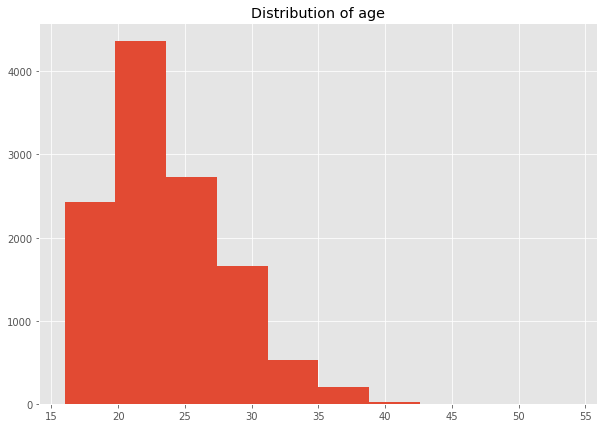

In [ ]:
plt.figure(figsize = [10, 7])
plt.hist(data['Age'])
plt.title('Distribution of age')
plt.xlim = (0, 45)

Text(0.5, 1.0, 'Distribution of Overall')

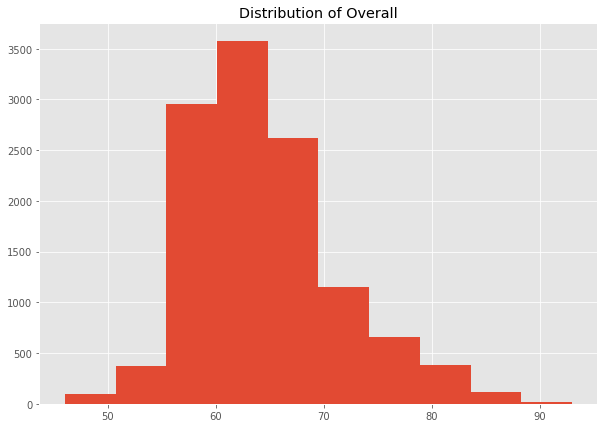

In [ ]:
#distribution for overall
plt.figure(figsize = [10, 7])
plt.hist(data['Overall'])
plt.title('Distribution of Overall')

In [ ]:
# find the mean of Overall
data['Overall'].mean()

64.40644891122278

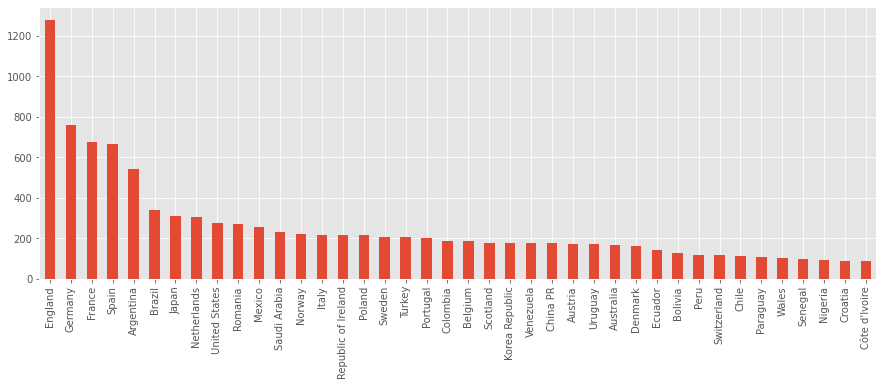

In [ ]:
#distribution of top 40 nationaltites
data['Nationality'].value_counts().head(40).plot(kind = 'bar', figsize=[15,5])

In [ ]:
#count no of null values in Potential Column
count = data["Potential"].isna().sum()
count

0

Text(0.5, 1.0, 'Distribution of Potential')

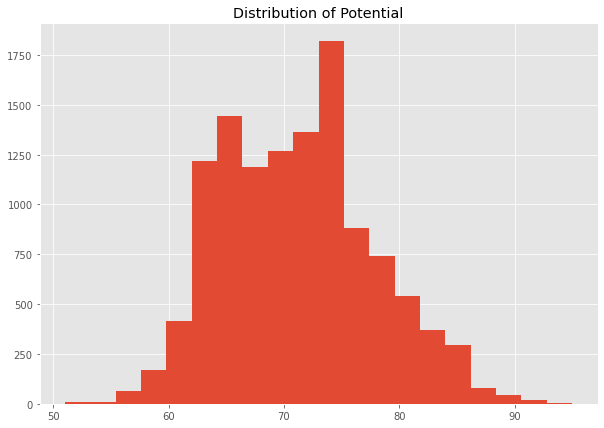

In [ ]:
#distribution for Potential
plt.figure(figsize = [10, 7])
plt.hist(data['Potential'], histtype='barstacked', bins=20)
plt.style.use('ggplot')
plt.title('Distribution of Potential')

In [ ]:
data['Potential'].mean()

71.09974874371859

## Data Cleaning

In [ ]:
football = data.copy()

In [ ]:
# to convert string data of value and wage columns to float value
def str_to_float(euros):
    #convert M in value column to millions
    if euros[-1] == 'M':
        return float(euros[:-1])*1000000
    #convert K in wage column to thousands
    elif euros[-1] == 'K':
        return float(euros[:-1])*1000
    else:
        return float(euros[:])

In [ ]:
# convert Weight to int and clean kg
def str_to_int(input):
    if 'kg' in input:
      return float(input.split('kg')[0])
    if 'cm' in input:
      return float(input.split('cm')[0])

In [ ]:
# change in Value column
football['Value'] = football['Value'].apply(lambda x: str_to_float(x))
# change in Wage column
football['Wage'] = football['Wage'].apply(lambda x: str_to_float(x))
# change in Weight column
football['Weight'] = football['Weight'].astype('str')
football['Weight'] = football['Weight'].apply(lambda x: str_to_int(x))
# change in Height column
football['Height'] = football['Height'].astype('str')
football['Height'] = football['Height'].apply(lambda x: str_to_int(x))

In [ ]:
football[['Name', 'Value','Wage', 'Weight', 'Height']]

,Name,Value,Wage,Weight,Height
0,16 G. Pasquale,625000.0,7000.0,82.0,182.0
1,14 R. Giggs,1000.0,60000.0,71.0,179.0
2,11 N. Ventola,0.0,0.0,80.0,185.0
3,G. Buffon,2300000.0,3000.0,92.0,192.0
4,11 G. Coupet,0.0,0.0,80.0,181.0
...,...,...,...,...,...
11935,J. Heil,1000000.0,2000.0,70.0,176.0
11936,S. Pierotti,1700000.0,2000.0,82.0,187.0
11937,K. Ogawa,750000.0,1000.0,65.0,170.0
11938,T. Sibbick,1500000.0,2000.0,69.0,189.0


In [ ]:
# clean the Name attribute 
def clean_name(name):
    for c in name:
        if c.isalpha():
            return name
        name = name.replace(c, '')

In [ ]:
football['Name'] = football['Name'].apply(lambda x: clean_name(x))

In [ ]:
football

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Total_stats,Height,Weight,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness,Standing Tackle,Sliding tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,2,G. Pasquale,33,https://cdn.sofifa.net/players/000/002/16_60.png,Italy,https://cdn.sofifa.net/flags/it.png,69,69,Udinese Calcio,https://cdn.sofifa.net/teams/55/30.png,625000.0,7000.0,1929,182.0,82.0,73,65.0,60,69,71,68,74,68.0,69,68.0,74,68.0,69,68,68,72,69,63,66.0,50,NaN,70,69,69.0,14,5,15,10,12,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70,17
1,241,R. Giggs,39,https://cdn.sofifa.net/players/000/241/14_60.png,Wales,https://cdn.sofifa.net/flags/gb-wls.png,78,78,Manchester United,https://cdn.sofifa.net/teams/11/30.png,1000.0,60000.0,1939,179.0,71.0,77,87.0,78,81,79,59,60,72.0,76,70.0,71,59.0,48,61,71,60,47,78,83.0,90,NaN,26,43,51.0,10,5,7,5,5,71,71,71,78,74,74,74,78,78,78,78,77,73,73,73,77,62,63,63,63,62,57,53,53,53,57,11
2,965,N. Ventola,32,https://cdn.sofifa.net/players/000/965/11_60.png,Italy,https://cdn.sofifa.net/flags/it.png,62,80,Novara Calcio,https://cdn.sofifa.net/teams/112225/30.png,0.0,0.0,1662,185.0,80.0,50,56.0,60,49,54,74,74,73.0,68,70.0,70,71.0,60,69,52,51,20,79,73.0,71,NaN,18,31,25.0,14,5,13,5,5,62,62,62,61,61,61,61,61,61,61,61,62,58,58,58,62,46,48,48,48,46,44,44,44,44,44,12
3,1179,G. Buffon,43,https://cdn.sofifa.net/players/001/179/22_60.png,Italy,https://cdn.sofifa.net/flags/it.png,80,80,Parma,https://cdn.sofifa.net/teams/50/30.png,2300000.0,3000.0,1270,192.0,92.0,26,20.0,13,35,28,37,30,55.0,78,49.0,53,69.0,34,65,13,38,28,12,50.0,22,70.0,13,11,11.0,76,73,70,90,76,31,31,31,30,32,32,32,30,34,34,34,32,35,35,35,32,28,32,32,32,28,26,28,28,28,26,78
4,1747,G. Coupet,37,https://cdn.sofifa.net/players/001/747/11_60.png,France,https://cdn.sofifa.net/flags/fr.png,75,83,Paris Saint-Germain,https://cdn.sofifa.net/teams/73/30.png,0.0,0.0,1149,181.0,80.0,14,10.0,10,27,28,36,41,33.0,65,55.0,22,72.0,41,63,10,36,22,11,32.0,31,NaN,13,13,12.0,75,77,73,78,73,25,25,25,27,25,25,25,27,24,24,24,27,28,28,28,27,24,29,29,29,24,25,28,28,28,25,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,244435,J. Heil,23,https://cdn.sofifa.net/players/244/435/21_60.png,Austria,https://cdn.sofifa.net/flags/at.png,65,70,TSV Egger Glas Hartberg,https://cdn.sofifa.net/teams/2017/30.png,1000000.0,2000.0,1815,176.0,70.0,66,63.0,43,64,65,73,65,70.0,57,76.0,65,72.0,68,73,63,71,62,64,65.0,46,59.0,66,63,62.0,6,11,14,14,9,63,63,63,64,64,64,64,64,64,64,64,65,64,64,64,65,64,65,65,65,64,63,64,64,64,63,15
11936,253139,S. Pierotti,19,https://cdn.sofifa.net/players/253/139/21_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,65,77,Club Atlético Colón,https://cdn.sofifa.net/teams/110406/30.png,1700000.0,2000.0,1764,187.0,82.0,67,57.0,47,59,69,67,69,65.0,67,63.0,69,61.0,55,73,65,59,45,69,67.0,55,69.0,45,57,55.0,14,6,7,11,12,70,70,70,70,71,71,71,70,70,70,70,69,68,68,68,69,65,65,65,65,65,64,63,63,63,64,17
11937,232916,K. Ogawa,27,https://cdn.sofifa.net/players/232/916/21_60.png,Japan,https://cdn.sofifa.net/flags/jp.png,65,65,Yokohama FC,https://cdn.sofifa.net/teams/113197/30.png,750000.0,1000.0,1780,170.0,65.0,65,62.0,53,60,64,73,71,77.0,59,80.0,65,66.0,83,56,61,53,54,61,57.0,59,56.0,47,49,51.0,12,11,9,11,11,61,61,61,63,62,62,62,63,62,62,62,63,60,60,60,63,58,55,55,55,58,56,50,50,50,56,16
11938,236244,T. Sibbick,21,https://cdn.sofifa.net/players/236/244/21_60.png,England,http

## Removing unwanted attributes

In [ ]:
# drop column
# df.count() does not include NaN values
#df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del football['Composure']

In [ ]:
# delete columns from dataset
football = football.drop(['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning','GK Reflexes', 'GK', 'Strength'], axis=1)

## Data Distribution for Value

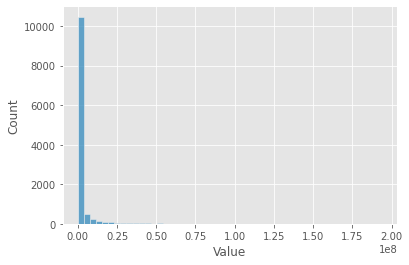

In [ ]:
plot = sns.histplot(football['Value'], bins=50)
plot.xlim = (0.0, 1.0)

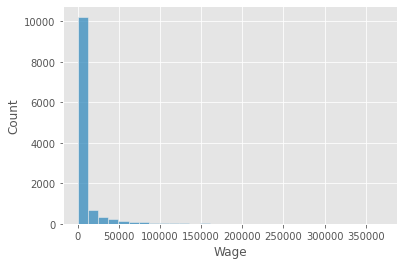

In [ ]:
#data distribution for wages
r = sns.histplot(football['Wage'], bins=30)
r.xlim = (0, 100000)

# Handling missing values

In [ ]:
#count null value for 'Club' column
football['Club'].isna().sum()

136

In [ ]:
# rows with empty club names are removed
football = football.fillna(value = 'Unknown')
football.drop(football.index[football['Club'] == 'Unknown'], inplace=True)

In [ ]:
football.shape

(11804, 63)

In [ ]:
#count number of null values in 'club' column
football.loc[football['Club'].isna()].shape

(0, 63)

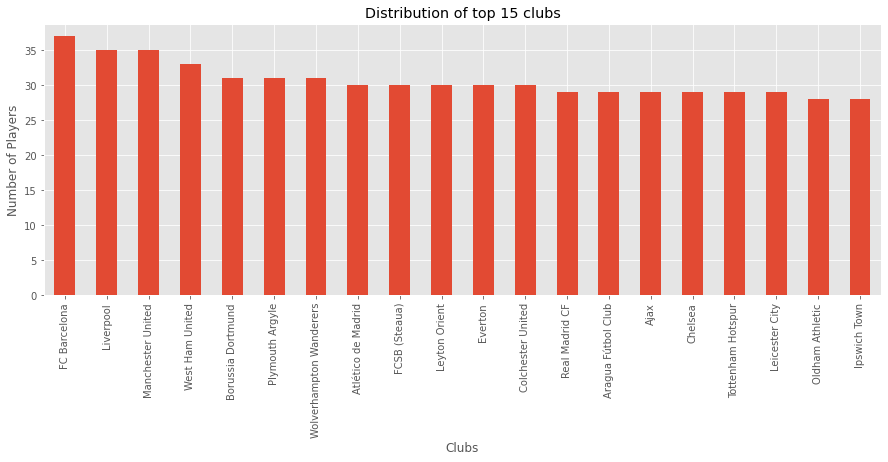

In [ ]:
#distribution of top 15 clubs
football['Club'].value_counts().head(20).plot(kind = 'bar', figsize=[15,5], title = 'Distribution of top 15 clubs', xlabel='Clubs', ylabel='Number of Players')

In [ ]:
football['Value'] = football['Value'].replace(0, np.nan)
football['Wage'] = football['Wage'].replace(0, np.nan)
football.Value.fillna(value=football.Value.mean(), inplace=True)
football.Wage.fillna(value=football.Wage.mean(), inplace=True)

In [ ]:
# missing values have been handled
print(football.loc[football.Value == 0].shape)
print(football.loc[football.Wage == 0].shape)

(0, 63)
(0, 63)


In [ ]:
football.fillna(football.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
# All missing values have been handled
football.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11804 entries, 0 to 11939
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   11804 non-null  int64  
 1   Name                 11804 non-null  object 
 2   Age                  11804 non-null  int64  
 3   Photo                11804 non-null  object 
 4   Nationality          11804 non-null  object 
 5   Flag                 11804 non-null  object 
 6   Overall              11804 non-null  int64  
 7   Potential            11804 non-null  int64  
 8   Club                 11804 non-null  object 
 9   Club Logo            11804 non-null  object 
 10  Value                11804 non-null  float64
 11  Wage                 11804 non-null  float64
 12  Total_stats          11804 non-null  int64  
 13  Height               11804 non-null  float64
 14  Weight               11804 non-null  float64
 15  Dribbling            11804 non-null 

In [ ]:
football

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Total_stats,Height,Weight,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Defensive awareness,Standing Tackle,Sliding tackle,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,2,G. Pasquale,33,https://cdn.sofifa.net/players/000/002/16_60.png,Italy,https://cdn.sofifa.net/flags/it.png,69,69,Udinese Calcio,https://cdn.sofifa.net/teams/55/30.png,6.250000e+05,7000.000000,1929,182.0,82.0,73,65.0,60,69,71,68,74,68.0,69,68.0,74,68.0,69,68,72,69,63,66.0,50,70,69,69.0,65,65,65,68,67,67,67,68,68,68,68,69,69,69,69,69,71,70,70,70,71,70,69,69,69,70
1,241,R. Giggs,39,https://cdn.sofifa.net/players/000/241/14_60.png,Wales,https://cdn.sofifa.net/flags/gb-wls.png,78,78,Manchester United,https://cdn.sofifa.net/teams/11/30.png,1.000000e+03,60000.000000,1939,179.0,71.0,77,87.0,78,81,79,59,60,72.0,76,70.0,71,59.0,48,71,60,47,78,83.0,90,26,43,51.0,71,71,71,78,74,74,74,78,78,78,78,77,73,73,73,77,62,63,63,63,62,57,53,53,53,57
2,965,N. Ventola,32,https://cdn.sofifa.net/players/000/965/11_60.png,Italy,https://cdn.sofifa.net/flags/it.png,62,80,Novara Calcio,https://cdn.sofifa.net/teams/112225/30.png,3.115434e+06,8795.291575,1662,185.0,80.0,50,56.0,60,49,54,74,74,73.0,68,70.0,70,71.0,60,52,51,20,79,73.0,71,18,31,25.0,62,62,62,61,61,61,61,61,61,61,61,62,58,58,58,62,46,48,48,48,46,44,44,44,44,44
3,1179,G. Buffon,43,https://cdn.sofifa.net/players/001/179/22_60.png,Italy,https://cdn.sofifa.net/flags/it.png,80,80,Parma,https://cdn.sofifa.net/teams/50/30.png,2.300000e+06,3000.000000,1270,192.0,92.0,26,20.0,13,35,28,37,30,55.0,78,49.0,53,69.0,34,13,38,28,12,50.0,22,13,11,11.0,31,31,31,30,32,32,32,30,34,34,34,32,35,35,35,32,28,32,32,32,28,26,28,28,28,26
4,1747,G. Coupet,37,https://cdn.sofifa.net/players/001/747/11_60.png,France,https://cdn.sofifa.net/flags/fr.png,75,83,Paris Saint-Germain,https://cdn.sofifa.net/teams/73/30.png,3.115434e+06,8795.291575,1149,181.0,80.0,14,10.0,10,27,28,36,41,33.0,65,55.0,22,72.0,41,10,36,22,11,32.0,31,13,13,12.0,25,25,25,27,25,25,25,27,24,24,24,27,28,28,28,27,24,29,29,29,24,25,28,28,28,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11935,244435,J. Heil,23,https://cdn.sofifa.net/players/244/435/21_60.png,Austria,https://cdn.sofifa.net/flags/at.png,65,70,TSV Egger Glas Hartberg,https://cdn.sofifa.net/teams/2017/30.png,1.000000e+06,2000.000000,1815,176.0,70.0,66,63.0,43,64,65,73,65,70.0,57,76.0,65,72.0,68,63,71,62,64,65.0,46,66,63,62.0,63,63,63,64,64,64,64,64,64,64,64,65,64,64,64,65,64,65,65,65,64,63,64,64,64,63
11936,253139,S. Pierotti,19,https://cdn.sofifa.net/players/253/139/21_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,65,77,Club Atlético Colón,https://cdn.sofifa.net/teams/110406/30.png,1.700000e+06,2000.000000,1764,187.0,82.0,67,57.0,47,59,69,67,69,65.0,67,63.0,69,61.0,55,65,59,45,69,67.0,55,45,57,55.0,70,70,70,70,71,71,71,70,70,70,70,69,68,68,68,69,65,65,65,65,65,64,63,63,63,64
11937,232916,K. Ogawa,27,https://cdn.sofifa.net/players/232/916/21_60.png,Japan,https://cdn.sofifa.net/flags/jp.png,65,65,Yokohama FC,https://cdn.sofifa.net/teams/113197/30.png,7.500000e+05,1000.000000,1780,170.0,65.0,65,62.0,53,60,64,73,71,77.0,59,80.0,65,66.0,83,61,53,54,61,57.0,59,47,49,51.0,61,61,61,63,62,62,62,63,62,62,62,63,60,60,60,63,58,55,55,55,58,56,50,50,50,56
11938,236244,T. Sibbick,21,https://cdn.sofifa.net/players/236/244/21_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,65,73,Barnsley,https://cdn.sofifa.net/teams/1932/30.png,1.500000e+06,2000.000000,1536,189.0,69.0,56,25.0,23,54,62,73,76,60.0,62,56.0,38,70.0,67,24,57,65,53,35.0,34,65,67,64.0,52,52,5

In [ ]:
#from sklearn import preprocessing
#d = preprocessing.normalize(football, axis=0)

## Duplicate values

In [ ]:
football['ID'].is_unique

False

In [ ]:
football = football.drop_duplicates(subset='ID', keep="first")

In [ ]:
football['ID'].is_unique

True

# Encoding the categorical variables

In [ ]:
#encoding of nationality
football['Nationality']= pd.factorize(football.Nationality)[0]
football[['Nationality']].head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Nationality
0,0
1,1
2,0
3,0
4,2
5,3
6,4
7,5
8,0
9,5


In [ ]:
#encoding of club
football['Club']= pd.factorize(football.Club)[0]
football[['Club']].tail(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Club
11915,411
11916,295
11917,727
11919,249
11920,798
11921,407
11923,383
11924,352
11925,768
11926,206


# Normalisation and Scaling

In [ ]:
football.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Total_stats',
       'Height', 'Weight', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Defensive awareness', 'Standing Tackle', 'Sliding tackle', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'],
      dtype='object')

In [ ]:
football = football.copy()
  
# apply normalization techniques by Column 
column = ['Value', 'Wage','Total_stats', 'Height', 'Weight', 'LS','ST', 'RS', 'LW', 'LF','CF', 'RF', 'RW', 'LAM', 'CAM','RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB','LCB', 'CB',
       'RCB', 'RB']
football[column] = (football[column] - football[column].min()) / (football[column].max() - football[column].min())    
  
# view normalized data
display(football)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Total_stats,Height,Weight,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Defensive awareness,Standing Tackle,Sliding tackle,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,2,G. Pasquale,33,https://cdn.sofifa.net/players/000/002/16_60.png,0,https://cdn.sofifa.net/flags/it.png,69,69,0,https://cdn.sofifa.net/teams/55/30.png,0.003217,0.017591,0.734603,0.510204,0.508772,73,65.0,60,69,71,68,74,68.0,69,68.0,74,68.0,69,68,72,69,63,66.0,50,70,69,69.0,0.653333,0.653333,0.653333,0.688312,0.662338,0.662338,0.662338,0.688312,0.675325,0.675325,0.675325,0.706667,0.729730,0.729730,0.729730,0.706667,0.800000,0.771429,0.771429,0.771429,0.800000,0.785714,0.726027,0.726027,0.726027,0.785714
1,241,R. Giggs,39,https://cdn.sofifa.net/players/000/241/14_60.png,1,https://cdn.sofifa.net/flags/gb-wls.png,78,78,1,https://cdn.sofifa.net/teams/11/30.png,0.000000,0.161028,0.740952,0.448980,0.315789,77,87.0,78,81,79,59,60,72.0,76,70.0,71,59.0,48,71,60,47,78,83.0,90,26,43,51.0,0.733333,0.733333,0.733333,0.818182,0.753247,0.753247,0.753247,0.818182,0.805195,0.805195,0.805195,0.813333,0.783784,0.783784,0.783784,0.813333,0.671429,0.671429,0.671429,0.671429,0.671429,0.600000,0.506849,0.506849,0.506849,0.600000
2,965,N. Ventola,32,https://cdn.sofifa.net/players/000/965/11_60.png,0,https://cdn.sofifa.net/flags/it.png,62,80,2,https://cdn.sofifa.net/teams/112225/30.png,0.016054,0.022450,0.565079,0.571429,0.473684,50,56.0,60,49,54,74,74,73.0,68,70.0,70,71.0,60,52,51,20,79,73.0,71,18,31,25.0,0.613333,0.613333,0.613333,0.597403,0.584416,0.584416,0.584416,0.597403,0.584416,0.584416,0.584416,0.613333,0.581081,0.581081,0.581081,0.613333,0.442857,0.457143,0.457143,0.457143,0.442857,0.414286,0.383562,0.383562,0.383562,0.414286
3,1179,G. Buffon,43,https://cdn.sofifa.net/players/001/179/22_60.png,0,https://cdn.sofifa.net/flags/it.png,80,80,3,https://cdn.sofifa.net/teams/50/30.png,0.011851,0.006766,0.316190,0.714286,0.684211,26,20.0,13,35,28,37,30,55.0,78,49.0,53,69.0,34,13,38,28,12,50.0,22,13,11,11.0,0.200000,0.200000,0.200000,0.194805,0.207792,0.207792,0.207792,0.194805,0.233766,0.233766,0.233766,0.213333,0.270270,0.270270,0.270270,0.213333,0.185714,0.228571,0.228571,0.228571,0.185714,0.157143,0.164384,0.164384,0.164384,0.157143
4,1747,G. Coupet,37,https://cdn.sofifa.net/players/001/747/11_60.png,2,https://cdn.sofifa.net/flags/fr.png,75,83,4,https://cdn.sofifa.net/teams/73/30.png,0.016054,0.022450,0.239365,0.489796,0.473684,14,10.0,10,27,28,36,41,33.0,65,55.0,22,72.0,41,10,36,22,11,32.0,31,13,13,12.0,0.120000,0.120000,0.120000,0.155844,0.116883,0.116883,0.116883,0.155844,0.103896,0.103896,0.103896,0.146667,0.175676,0.175676,0.175676,0.146667,0.128571,0.185714,0.185714,0.185714,0.128571,0.142857,0.164384,0.164384,0.164384,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,243155,Manu Hernando,21,https://cdn.sofifa.net/players/243/155/21_60.png,10,https://cdn.sofifa.net/flags/es.png,65,77,212,https://cdn.sofifa.net/teams/2023/30.png,0.008758,0.004060,0.532063,0.530612,0.298246,56,44.0,49,51,61,59,65,62.0,64,62.0,51,66.0,71,50,63,63,43,37.0,42,70,63,64.0,0.493333,0.493333,0.493333,0.480519,0.467532,0.467532,0.467532,0.480519,0.467532,0.467532,0.467532,0.506667,0.540541,0.540541,0.540541,0.506667,0.657143,0.657143,0.657143,0.657143,0.657143,0.671429,0.671233,0.671233,0.671233,0.671429
11935,244435,J. Heil,23,https://cdn.sofifa.net/players/244/435/21_60.png,47,https://cdn.sofifa.net/flags/at.png,65,70,458,https://cdn.sofifa.net/teams/2017/30.png,0.005150,0.004060,0.662222,0.387755,0.298246,66,63

In [ ]:
football2.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Total_stats',
       'Height', 'Weight', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Defensive awareness', 'Standing Tackle', 'Sliding tackle', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Zscore'],
      dtype='object')

In [ ]:
football2 = football.copy()

# Data Visualization

In [ ]:
football2.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Total_stats,Height,Weight,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Defensive awareness,Standing Tackle,Sliding tackle,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,2,G. Pasquale,33,https://cdn.sofifa.net/players/000/002/16_60.png,0,https://cdn.sofifa.net/flags/it.png,69,69,0,https://cdn.sofifa.net/teams/55/30.png,0.003217,0.017591,0.734603,0.510204,0.508772,73,65.0,60,69,71,68,74,68.0,69,68.0,74,68.0,69,68,72,69,63,66.0,50,70,69,69.0,0.653333,0.653333,0.653333,0.688312,0.662338,0.662338,0.662338,0.688312,0.675325,0.675325,0.675325,0.706667,0.729730,0.729730,0.729730,0.706667,0.800000,0.771429,0.771429,0.771429,0.800000,0.785714,0.726027,0.726027,0.726027,0.785714
1,241,R. Giggs,39,https://cdn.sofifa.net/players/000/241/14_60.png,1,https://cdn.sofifa.net/flags/gb-wls.png,78,78,1,https://cdn.sofifa.net/teams/11/30.png,0.000000,0.161028,0.740952,0.448980,0.315789,77,87.0,78,81,79,59,60,72.0,76,70.0,71,59.0,48,71,60,47,78,83.0,90,26,43,51.0,0.733333,0.733333,0.733333,0.818182,0.753247,0.753247,0.753247,0.818182,0.805195,0.805195,0.805195,0.813333,0.783784,0.783784,0.783784,0.813333,0.671429,0.671429,0.671429,0.671429,0.671429,0.600000,0.506849,0.506849,0.506849,0.600000
2,965,N. Ventola,32,https://cdn.sofifa.net/players/000/965/11_60.png,0,https://cdn.sofifa.net/flags/it.png,62,80,2,https://cdn.sofifa.net/teams/112225/30.png,0.016054,0.022450,0.565079,0.571429,0.473684,50,56.0,60,49,54,74,74,73.0,68,70.0,70,71.0,60,52,51,20,79,73.0,71,18,31,25.0,0.613333,0.613333,0.613333,0.597403,0.584416,0.584416,0.584416,0.597403,0.584416,0.584416,0.584416,0.613333,0.581081,0.581081,0.581081,0.613333,0.442857,0.457143,0.457143,0.457143,0.442857,0.414286,0.383562,0.383562,0.383562,0.414286
3,1179,G. Buffon,43,https://cdn.sofifa.net/players/001/179/22_60.png,0,https://cdn.sofifa.net/flags/it.png,80,80,3,https://cdn.sofifa.net/teams/50/30.png,0.011851,0.006766,0.316190,0.714286,0.684211,26,20.0,13,35,28,37,30,55.0,78,49.0,53,69.0,34,13,38,28,12,50.0,22,13,11,11.0,0.200000,0.200000,0.200000,0.194805,0.207792,0.207792,0.207792,0.194805,0.233766,0.233766,0.233766,0.213333,0.270270,0.270270,0.270270,0.213333,0.185714,0.228571,0.228571,0.228571,0.185714,0.157143,0.164384,0.164384,0.164384,0.157143
4,1747,G. Coupet,37,https://cdn.sofifa.net/players/001/747/11_60.png,2,https://cdn.sofifa.net/flags/fr.png,75,83,4,https://cdn.sofifa.net/teams/73/30.png,0.016054,0.022450,0.239365,0.489796,0.473684,14,10.0,10,27,28,36,41,33.0,65,55.0,22,72.0,41,10,36,22,11,32.0,31,13,13,12.0,0.120000,0.120000,0.120000,0.155844,0.116883,0.116883,0.116883,0.155844,0.103896,0.103896,0.103896,0.146667,0.175676,0.175676,0.175676,0.146667,0.128571,0.185714,0.185714,0.185714,0.128571,0.142857,0.164384,0.164384,0.164384,0.142857
5,2155,J. Elmander,34,https://cdn.sofifa.net/players/002/155/16_60.png,3,https://cdn.sofifa.net/flags/se.png,67,67,5,https://cdn.sofifa.net/teams/269/30.png,0.001928,0.025710,0.597460,0.632653,0.649123,64,56.0,54,60,64,64,65,65.0,66,47.0,73,72.0,58,66,78,35,69,66.0,53,31,39,23.0,0.680000,0.680000,0.680000,0.636364,0.649351,0.649351,0.649351,0.636364,0.636364,0.636364,0.636364,0.640000,0.635135,0.635135,0.635135,0.640000,0.500000,0.528571,0.528571,0.528571,0.500000,0.471429,0.465753,0.465753,0.465753,0.471429
6,2956,S. Petrov,32,https://cdn.sofifa.net/players/002/956/13_60.png,4,https://cdn.sofifa.net/flags/bg.png,76,76,6,https://cdn.sofifa.net/teams/2/30.png,0.011335,0.052774,0.728889,0.469388,0.421053,67,45.0,66,79,79,54,43,53.0,78,56.0,80,67.0,52,78,68,82,65,76.0,67,60,62,70.0,0.706667,0.706667,0.706667,0.688312,0.714286,0.714286,0.714286,0.688312,0.740260,0.740260,0.740260,0.706667,0.810811,0.810811,0.810811,0.706667,0.757143,0.814286,0.814286,0.814286,0.757143,0.757143,0.73972

## Normal Distribution

In [ ]:
# z-score calcuation
#football2['Zscore'] = football2.groupby('Nationality').Overall.apply(lambda x: x.div(x.mean()))
#football2.iloc[:900, :].groupby(['Nationality'])['Zscore'].plot.kde()

## 1. Handling the outliers in the data, if any , using a Boxplot.

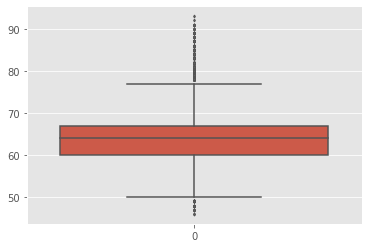

In [ ]:
sns.boxplot(data=football2['Overall'],  flierprops = dict(markerfacecolor = '0.50', markersize = 2))

## 2.  Representing part of a whole relationship, using Piechart

In [ ]:
football2.loc[football2['Name'] == 'G. Buffon'].iloc[0, 15:36]

Dribbling                26
Curve                  20.0
FK Accuracy              13
Long Passing             35
Ball Control             28
Acceleration             37
Sprint Speed             30
Agility                55.0
Reactions                78
Balance                49.0
Shot Power               53
Jumping                69.0
Stamina                  34
Long Shots               13
Aggression               38
Interceptions            28
Positioning              12
Vision                 50.0
Penalties                22
Defensive awareness      13
Standing Tackle          11
Name: 3, dtype: object

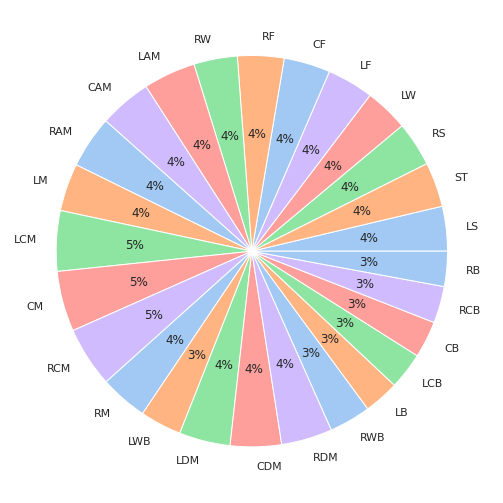

In [ ]:
# One player represented
fig, ax = plt.subplots(figsize=(12, 9))
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(football2.loc[football2['Name'] == 'G. Buffon'].iloc[0, 37:len(football2.columns)-1], labels=['LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'], colors = colors, autopct='%.0f%%')
plt.show()

## 3. Create a heatmap using Seaborn to visualize the correlation between the different columns of our data.

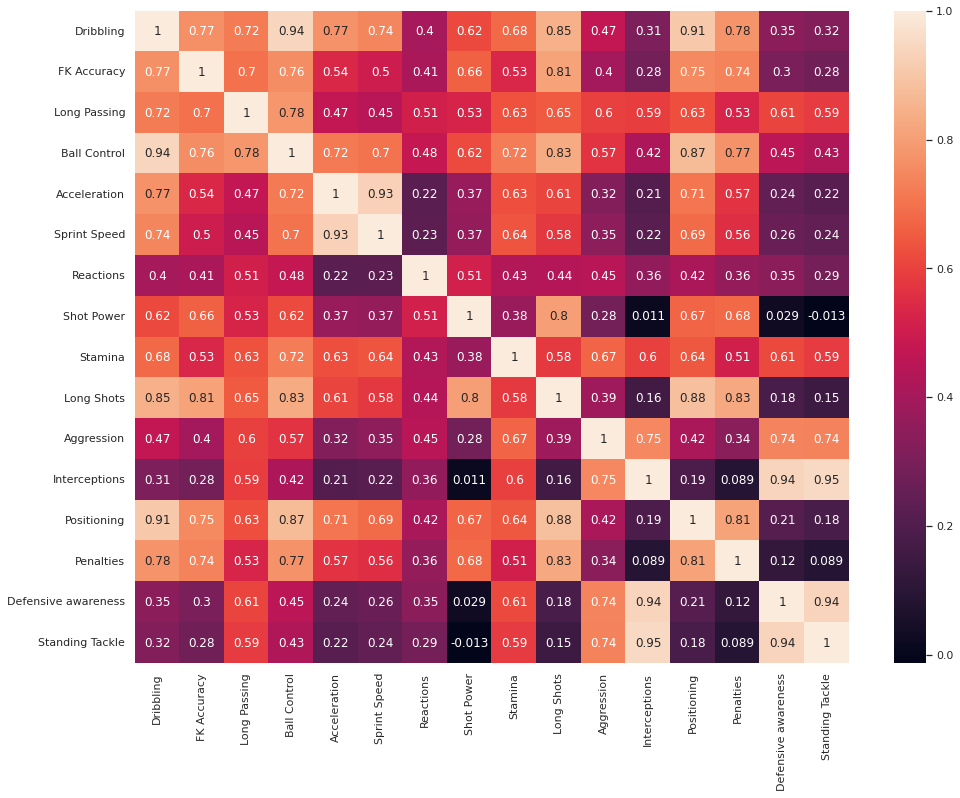

In [ ]:
# plots heatmap for different skills
fig, ax = plt.subplots(figsize=(16, 12))
corr = football2.iloc[:, 15:36].corr()
sns.heatmap(corr, annot = True)

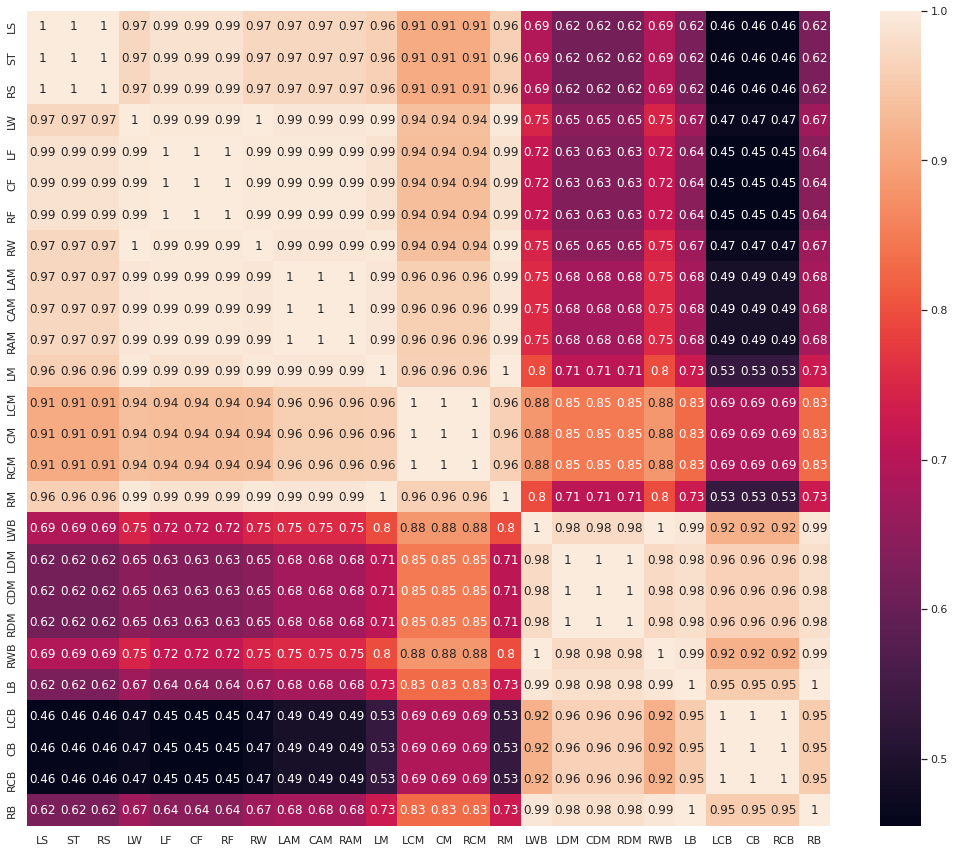

In [ ]:
# plots heatmap for different positions
fig, ax = plt.subplots(figsize=(18, 15))  
corr = football2.iloc[:, 36:len(football2.columns)-1].corr()
sns.heatmap(corr, annot = True)

## 4. Visualize the relation between different columns using a regression plot/scatter plot for doing analysis

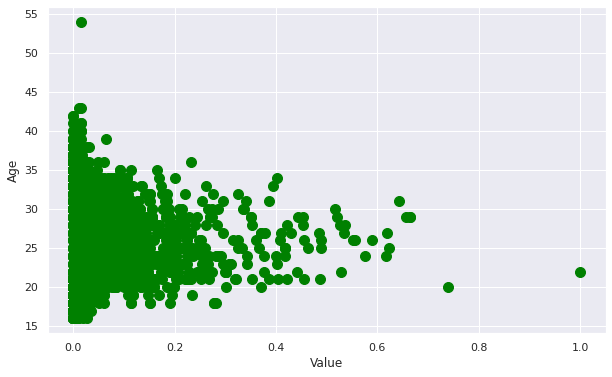

In [ ]:
football2.plot.scatter(x = 'Value', y = 'Age', s = 100, c="green", figsize=(10, 6));

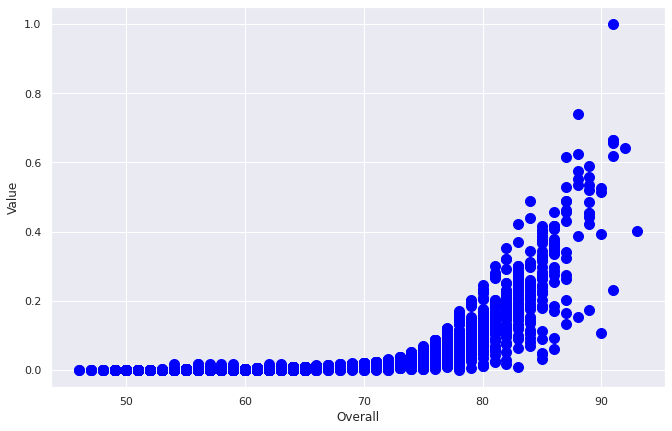

In [ ]:
football2.plot.scatter(x = 'Overall', y = 'Value', s = 100, c="blue", figsize=(11, 7));

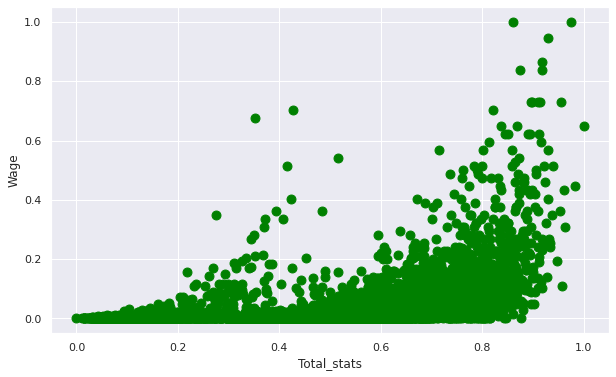

In [ ]:
football2.plot.scatter(x = 'Total_stats', y = 'Wage', s = 80, c="green", figsize=(10, 6));



## 5. Use of the Column charts and other charts

Text(0, 0.5, 'Total_stats')

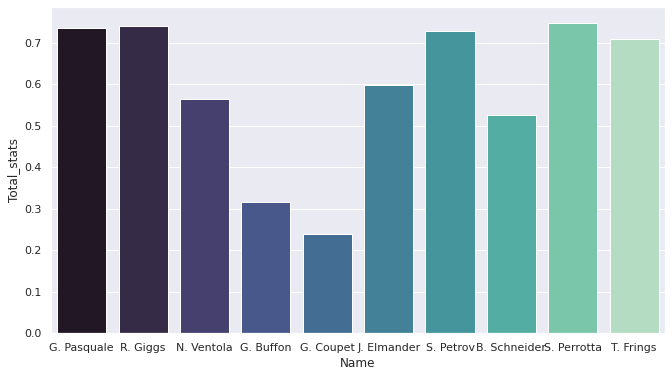

In [ ]:
plt.figure(figsize=(11,6))
a=sns.barplot(x = football2['Name'].head(10), y =football2['Total_stats'].head(10),  palette = 'mako')
plt.xlabel('Name', fontsize =12)
plt.ylabel('Total_stats', fontsize =12)

Text(0, 0.5, 'Potential')

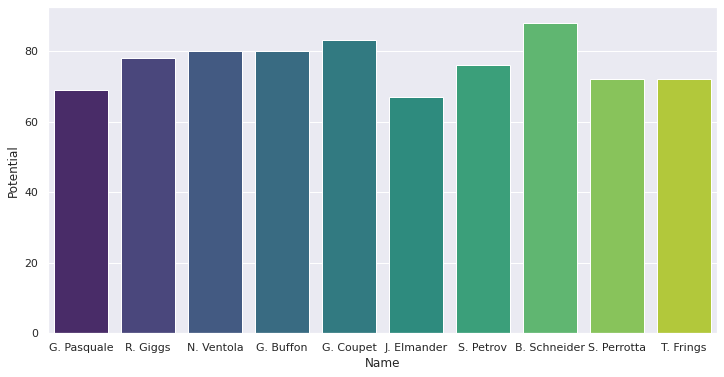

In [ ]:
plt.figure(figsize=(12,6))
a=sns.barplot(x = football2['Name'].head(10), y =football2['Potential'].head(10),  palette = 'viridis')
plt.xlabel('Name', fontsize =12)
plt.ylabel('Potential', fontsize =12)

[Text(0, 0, 'R. Pedriel'),
 Text(0, 0, 'L. Krasniqi'),
 Text(0, 0, 'D. Vaca'),
 Text(0, 0, 'D. Diamantakos'),
 Text(0, 0, 'C. McFadzean'),
 Text(0, 0, 'Clayton'),
 Text(0, 0, 'M. Sarr'),
 Text(0, 0, 'P. Mullin'),
 Text(0, 0, 'H. Khabra'),
 Text(0, 0, 'J. Elez')]

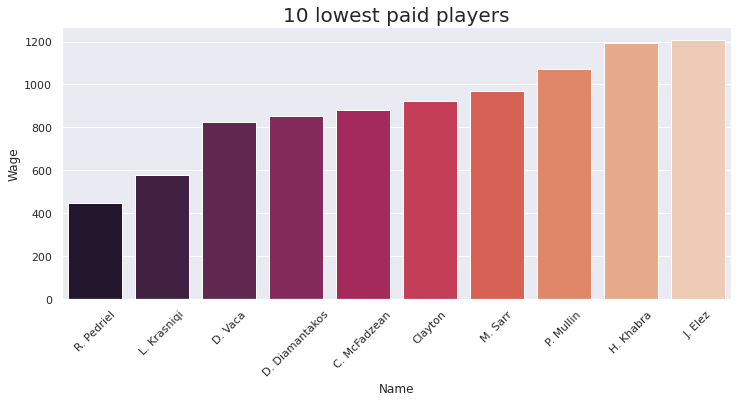

In [ ]:
topwage = football2[['Name','Value', 'Wage']].nsmallest(10,'Wage', keep = 'first')
plt.figure(figsize=(12,5))
a=sns.barplot(x = topwage['Name'], y =topwage.index,  palette = 'rocket')
plt.title('10 lowest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)
a.set_xticklabels(a.get_xticklabels(), rotation=45)